<a href="https://colab.research.google.com/github/ReshmiMaulik/Data-Sets-for-Projects/blob/main/Project_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/ReshmiMaulik/Data-Sets-for-Projects.git

Cloning into 'Data-Sets-for-Projects'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# To partition the data
from sklearn.model_selection import train_test_split

In [3]:
#Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

In [4]:
# Importing performance metrics-accuracy score and confusion matrix
from sklearn.metrics import average_precision_score,confusion_matrix

In [6]:
# Import data
hf=pd.read_csv('/content/Data-Sets-for-Projects/heart_failure_clinical_records_dataset.csv')

In [7]:
#Creating a copy of original data
data=hf.copy()

In [8]:
#Exploratory data analysis
#1.To check variable data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [9]:
#2. Data Preprocessiong(Looking for missing values)
data.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#Print data columns with missing values
print('Data Columns with null values:\n',data.isnull().sum())

Data Columns with null values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [12]:
#Summary of numerical variables
summary_num=data.describe()
print(summary_num)

              age     anaemia  ...        time  DEATH_EVENT
count  299.000000  299.000000  ...  299.000000    299.00000
mean    60.833893    0.431438  ...  130.260870      0.32107
std     11.894809    0.496107  ...   77.614208      0.46767
min     40.000000    0.000000  ...    4.000000      0.00000
25%     51.000000    0.000000  ...   73.000000      0.00000
50%     60.000000    0.000000  ...  115.000000      0.00000
75%     70.000000    1.000000  ...  203.000000      1.00000
max     95.000000    1.000000  ...  285.000000      1.00000

[8 rows x 13 columns]


In [13]:
# Checking for unique classes
print(np.unique(data['diabetes']))
print(np.unique(data['anaemia']))

[0 1]
[0 1]


In [ ]:
#data=pd.read_csv(''/content/Data-Sets-for-Projects/heart_failure_clinical_records_dataset.csv',na_values=["?"])


In [15]:
#Data Preprocessing
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [16]:
#axis=1=> to consider at least one column value is missing
missing=data[data.isnull().any(axis=1)]

In [19]:
data2=data.dropna(axis=0) # To remove missing values rows 

In [21]:
#Relationship between independent variables
correlation=data2.corr()# if value is near to zero, this means there is no correlation between variables
correlation

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [22]:
data2.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [24]:
# Diabetes proportion table:
diabetes=pd.crosstab(index=data2["diabetes"],columns='count',normalize=True)
print(diabetes)

col_0       count
diabetes         
0         0.58194
1         0.41806


In [25]:
#high_blood_pressure proportion table:
high_blood_pressure=pd.crosstab(index=data2["high_blood_pressure"],columns='count',normalize=True)
print(high_blood_pressure)

col_0                   count
high_blood_pressure          
0                    0.648829
1                    0.351171


In [26]:
# Row=smoking and column is death event and normalize= index means row proportion =1
smoking_death=pd.crosstab(index=data2["smoking"],columns=data2["DEATH_EVENT"],margins=True,normalize='index')
print(smoking_death)  

DEATH_EVENT         0         1
smoking                        
0            0.674877  0.325123
1            0.687500  0.312500
All          0.678930  0.321070


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


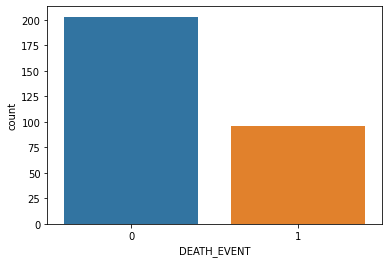

In [27]:
# Frequency distribution of death
DEATH_EVENT=sns.countplot(data2['DEATH_EVENT'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


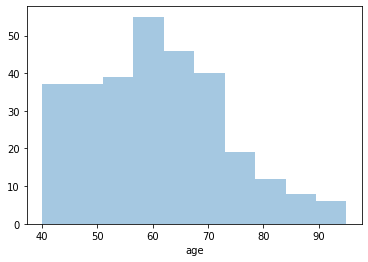

In [30]:
# Histogram of age and kde =False to obtain frequency from y-axis and bins=10 means gap of 10
sns.distplot(data2['age'],bins=10,kde=False)

People with age between 55 to 72 has more cases of heart_failure

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


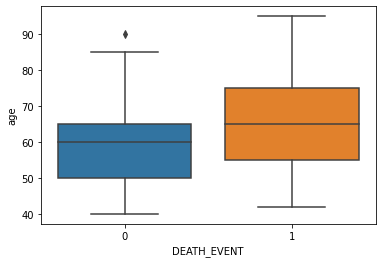

In [31]:
sns.boxplot('DEATH_EVENT','age',data=data2)

In [32]:
data2.groupby('DEATH_EVENT')['diabetes'].median()

DEATH_EVENT
0    0
1    0
Name: diabetes, dtype: int64